In [1]:
! git clone https://github.com/kristerseiya/WasteNet.git

Cloning into 'WasteNet'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 62 (delta 22), reused 54 (delta 14), pack-reused 0
Unpacking objects: 100% (62/62), done.


In [2]:
% cd WasteNet/

/content/WasteNet


In [55]:
! git pull origin main

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/kristerseiya/WasteNet
 * branch            main       -> FETCH_HEAD
   626b346..0966c72  main       -> origin/main
Updating 626b346..0966c72
Fast-forward
 run.py | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [58]:
import torch
from torch.utils.data import DataLoader
from torch.optim import Adam
import matplotlib.pyplot as plt

In [16]:
import data
import model
import run

In [17]:
from importlib import reload

In [56]:
reload(data)
reload(model)
reload(run)

<module 'run' from '/content/WasteNet/run.py'>

In [53]:
torch.cuda.empty_cache()

In [20]:
dataset_top_dir = '/content/gdrive/MyDrive/Dataset/WasteNet-resized'

dataset = data.WasteNetDataset([dataset_top_dir+'/data-resized', dataset_top_dir+'/data2-resized'],
                               store='ram', exclude=['google'])

In [21]:
len(dataset)

7444

In [22]:
dataset.print_stats()

paper: 1237
glass: 1765
metal: 1555
plastic bag: 167
plastic bottle: 1882
other plastic: 195
disposable cup: 90
food / snack wraps: 111
food contamination: 114
other: 328


In [23]:
train_set, val_set, test_set = dataset.split(0.7, 0.1, 0.2)

In [24]:
trainldr = DataLoader(train_set, batch_size=12, shuffle=True, drop_last=True)
valldr = DataLoader(val_set, batch_size=12, shuffle=True,)
testldr = DataLoader(test_set, batch_size=12, shuffle=True)

In [25]:
torch.cuda.is_available()

True

In [26]:
device = torch.device('cuda')

In [38]:
net = model.WasteNet().move(device)

In [41]:
optimizer = Adam(net.parameters(), lr=1e-4)

In [42]:
log = run.train(net, optimizer, 20, trainldr, validation=valldr)

Epoch #1
Train Loss: 1.012
Val Loss: 0.728
Val Accs: 0.796
Epoch #2
Train Loss: 0.921
Val Loss: 0.733
Val Accs: 0.784
Epoch #3
Train Loss: 0.659
Val Loss: 0.653
Val Accs: 0.815
Epoch #4
Train Loss: 0.578
Val Loss: 0.501
Val Accs: 0.852
Epoch #5
Train Loss: 0.606
Val Loss: 0.479
Val Accs: 0.847
Epoch #6
Train Loss: 0.521
Val Loss: 0.452
Val Accs: 0.847
Epoch #7
Train Loss: 0.494
Val Loss: 0.696
Val Accs: 0.800
Epoch #8
 21%|██        | 92/434 [00:08<00:30, 11.24it/s]

KeyboardInterrupt: ignored

In [44]:
loss, acc = run.validate(net, testldr)
print('LOSS: {:.4f}'.format(loss))
print('ACCS: {:.2f}'.format(acc*100))

LOSS: 0.4658
ACCS: 86.51


In [61]:
cfs_mtx = run.get_confusion_matrix(net, testldr)

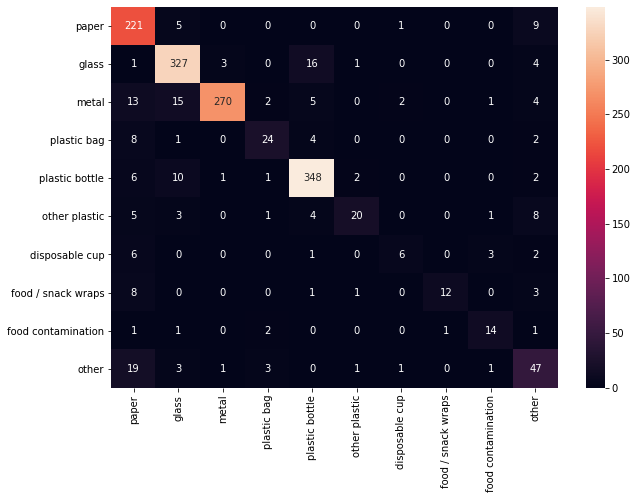

In [60]:
plt.figure(figsize=(10, 7))
run.plot_confusion_matrix(cfs_mtx)

In [62]:
torch.save(net.state_dict(), '../mar31_1103.pth')